In [3]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
cell = mp.Vector3(10,30,30) # in microns


Clad = mp.Cylinder(height=mp.inf,
                   radius=62.5, 
                   material=mp.Medium(index=1.44399),
                   axis=mp.Vector3(x=1,y=0,z=0) )

Core = mp.Cylinder(height=mp.inf,
                   radius=4, 
                   material=mp.Medium(index=1.44813),
                   axis=mp.Vector3(x=1,y=0,z=0) )

geometry = [Clad,Core]


fsrc = 1/1.55 # frequency of eigenmode or constant-amplitude source
df = 16e-3

kpoint = mp.Vector3(mp.X)
bnum = 1    # band number of eigenmode


sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=df),
                              center=mp.Vector3(x=0,y=0,z=0),
                              size=mp.Vector3(z=15,y=15),
                              direction=mp.X,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_parity=mp.NO_PARITY,
                              eig_match_freq=True)]


pml_layers = [mp.PML(thickness=1,direction=mp.Y),mp.PML(thickness=1,direction=mp.Z)]

sim = mp.Simulation(cell_size=cell,
                boundary_layers=pml_layers,
                eps_averaging=True,
                geometry=geometry,
                sources=sources,
                resolution=5,
                progress_interval=30,
                split_chunks_evenly=True,
                k_point=mp.Vector3(mp.X)
                )


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'interpolation':'none'})
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000565052 s
Working in 3D dimensions.
Computational cell is 10 x 30 x 30 with resolution 5
     cylinder, center = (0,0,0)
          radius 62.5, height 1e+20, axis (1, 0, 0)
          dielectric constant epsilon diagonal = (2.08511,2.08511,2.08511)
     cylinder, center = (0,0,0)
          radius 4, height 1e+20, axis (1, 0, 0)
          dielectric constant epsilon diagonal = (2.09708,2.09708,2.09708)
subpixel-averaging is 5.17561% done, 74.9415 s remaining
subpixel-averaging is 11.0617% done, 33.681 s remaining
subpixel-averaging is 16.9478% done, 20.7091 s remaining
subpixel-averaging is 22.8339% done, 14.7198 s remaining
subpixel-averaging is 28.72% done, 10.4892 s remaining
subpixel-averaging is 34.5047% done, 7.59557 s remaining
subpixel-averaging is 40.1878% done, 6.01467 s remaining
subpixel-averaging is 45.9724% done, 4.96566 s remaining
subpixel-averaging is 51.7571% done, 3.85769 s remaining
subpixel-ave

In [10]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 5000 #in femptoseconds

#sim.reset_meep()
sim.run(until=(Simtime*tFactor))

FloatProgress(value=30.100000381469727, description='0% done ', max=1530.10000038147, min=30.100000381469727)

on time step 301 (time=30.1), 0.0517226 s/step
on time step 2699 (time=269.9), 0.00166866 s/step
on time step 5122 (time=512.2), 0.00165121 s/step
on time step 7559 (time=755.9), 0.00164175 s/step
on time step 9991 (time=999.1), 0.00164521 s/step
on time step 12424 (time=1242.4), 0.00164435 s/step
on time step 14861 (time=1486.1), 0.00164164 s/step
run 1 finished at t = 1530.2 (15302 timesteps)


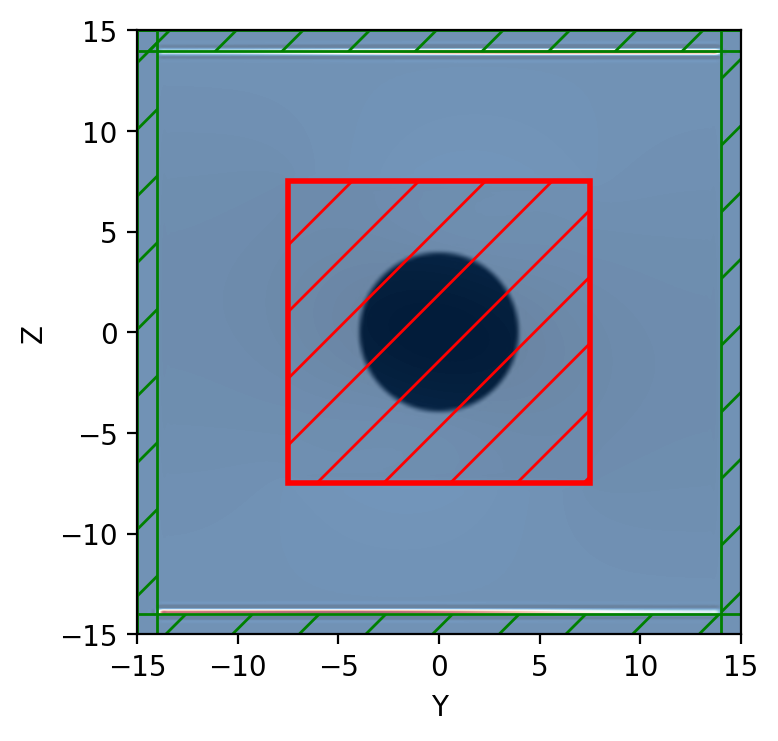

In [11]:
plt.figure(dpi=200)
sim.plot2D(fields=mp.Ez,plot_sources_flag=True,plot_monitors_flag=True)
plt.show()